In [36]:
#load the necessary modules
import pandas as pd
import numpy as np
import datetime, math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
from sklearn import svm, preprocessing
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense

In [2]:
path = './ten-datasets/germantrafficsigns/'

#load the dataset into a dataframe
df = pd.read_csv(path + 'signnames.csv')
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [4]:
#load the dataset into a dataframe

training_file = path+"train.p"
testing_file = path+"test.p"
validation_file= path+"valid.p"

with open(training_file, mode='rb') as f:
    train_data = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test_data = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    valid_data = pickle.load(f)

In [10]:
X_train, y_train = train_data['features'],train_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)


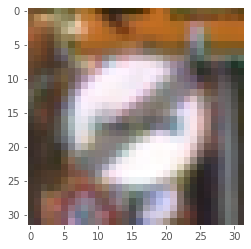

In [18]:
plt.imshow(X_train[130])
plt.grid(False)

In [20]:
X_flatten_train = X_train.reshape(len(X_train), -1)
X_flatten_train.shape

(34799, 3072)

In [21]:
X_flatten_test = X_test.reshape(len(X_test), -1)
X_flatten_test.shape

(12630, 3072)

In [23]:
# Scale value to range 0 to 1 
X_flatten_train = X_flatten_train / 255.0
X_flatten_test = X_flatten_test / 255.0

31

In [31]:
%%time

clf = RandomForestClassifier(criterion='gini', n_estimators=100)
clf.fit(X_flatten_train, y_train)

Wall time: 2min 44s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
accuracy = clf.score(X_flatten_train, y_train)
print('model training accuracy: %.4f' %(accuracy))

model training accuracy: 1.0000


In [33]:
accuracy = clf.score(X_flatten_test, y_test)
print('model test accuracy: %.4f' %(accuracy))

model test accuracy: 0.7511


# deep learning

In [39]:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [34]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat.shape

(34799, 43)

In [37]:
# 2 hidden layers, 100 units
inputs = Input(shape=X_flatten_train.shape[1:])
hidden = Dense(512, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(512, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(y_train_cat.shape[1], activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_flatten_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_flatten_test, y_test_cat))

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 12s 344us/step - loss: 0.0179 - accuracy: 0.3666 - val_loss: 0.0144 - val_accuracy: 0.5383
Epoch 2/10
34799/34799 [==============================] - 12s 341us/step - loss: 0.0115 - accuracy: 0.6511 - val_loss: 0.0119 - val_accuracy: 0.6385
Epoch 3/10
34799/34799 [==============================] - 12s 341us/step - loss: 0.0090 - accuracy: 0.7416 - val_loss: 0.0106 - val_accuracy: 0.6872
Epoch 4/10
34799/34799 [==============================] - 12s 341us/step - loss: 0.0080 - accuracy: 0.7705 - val_loss: 0.0093 - val_accuracy: 0.7288
Epoch 5/10
34799/34799 [==============================] - 12s 343us/step - loss: 0.0071 - accuracy: 0.7950 - val_loss: 0.0100 - val_accuracy: 0.7072
Epoch 6/10
34799/34799 [==============================] - 12s 343us/step - loss: 0.0065 - accuracy: 0.8101 - val_loss: 0.0086 - val_accuracy: 0.7451
Epoch 7/10
34799/34799 [==============================] 

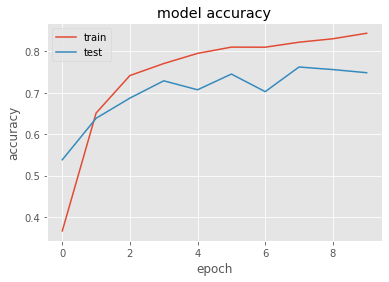

In [40]:
plot_history(history)

In [41]:
# 2 hidden layers, 100 units
inputs = Input(shape=X_flatten_train.shape[1:])
hidden = Dense(512, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(512, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(y_train_cat.shape[1], activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_flatten_train, y_train, batch_size=128, epochs=10, validation_data=(X_flatten_test, y_test))

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 8s 236us/step - loss: 3.2128 - accuracy: 0.2322 - val_loss: 2.9601 - val_accuracy: 0.3139
Epoch 2/10
34799/34799 [==============================] - 8s 232us/step - loss: 2.6154 - accuracy: 0.4274 - val_loss: 2.4575 - val_accuracy: 0.4230
Epoch 3/10
34799/34799 [==============================] - 9s 246us/step - loss: 2.1688 - accuracy: 0.5071 - val_loss: 2.1023 - val_accuracy: 0.4774
Epoch 4/10
34799/34799 [==============================] - 8s 242us/step - loss: 1.8354 - accuracy: 0.5658 - val_loss: 1.8382 - val_accuracy: 0.5497
Epoch 5/10
34799/34799 [==============================] - 9s 249us/step - loss: 1.5783 - accuracy: 0.6223 - val_loss: 1.6452 - val_accuracy: 0.5676
Epoch 6/10
34799/34799 [==============================] - 9s 245us/step - loss: 1.3783 - accuracy: 0.6687 - val_loss: 1.4854 - val_accuracy: 0.6264
Epoch 7/10
34799/34799 [==============================] - 9s 2

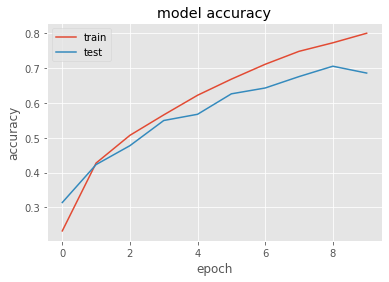

In [42]:
plot_history(history)

# CNN

In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('softmax'))

In [45]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [46]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 92s 3ms/step - loss: 2.0038 - accuracy: 0.5419 - val_loss: 0.3900 - val_accuracy: 0.8939
Epoch 2/10
34799/34799 [==============================] - 92s 3ms/step - loss: 0.3631 - accuracy: 0.8953 - val_loss: 0.2097 - val_accuracy: 0.9410
Epoch 3/10
34799/34799 [==============================] - 94s 3ms/step - loss: 0.2064 - accuracy: 0.9409 - val_loss: 0.1457 - val_accuracy: 0.9610
Epoch 4/10
34799/34799 [==============================] - 94s 3ms/step - loss: 0.1422 - accuracy: 0.9585 - val_loss: 0.1580 - val_accuracy: 0.9584
Epoch 5/10
34799/34799 [==============================] - 96s 3ms/step - loss: 0.1181 - accuracy: 0.9662 - val_loss: 0.1365 - val_accuracy: 0.9629
Epoch 6/10
34799/34799 [==============================] - 95s 3ms/step - loss: 0.0972 - accuracy: 0.9716 - val_loss: 0.1372 - val_accuracy: 0.9655
Epoch 7/10
34799/34799 [==============================] - 94s 3ms/st

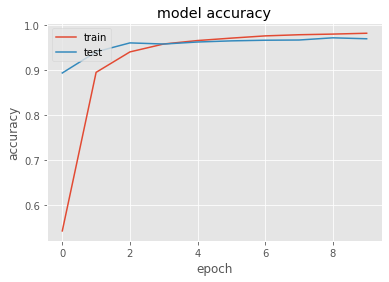

In [47]:
plot_history(history)